# Gaussian noise exploration


This is to explore the effects of the AddGaussianNoise transformation class


Import the necessary libraries


In [1]:
import torch
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import random

Import the Gaussian noise addition transformation class


In [2]:
from AddGaussianNoise import AddGaussianNoise

Set the seed for reproducability


In [3]:
random_seed = 42

torch.manual_seed(random_seed)
np.random.seed(random_seed)
random.seed(random_seed)

if (torch.cuda.is_available()):
    torch.cuda.manual_seed(random_seed)

Set some constant strings


In [4]:
root_dir = '../../data/'
test_set = 'test_dataset.csv'

Load the test set


In [5]:
df = pd.read_csv(os.path.join(root_dir, test_set))

# Check first few rows to confirm data is loaded correctly
print(df.head())

   Id    Dataset                                           Filepath  \
0   0      MLEND          ./dataset/mlend\MLEndSND_Public\01620.wav   
1   1  JL-CORPUS  ./dataset/jl-corpus/Raw JL corpus (unchecked a...   
2   2      MLEND          ./dataset/mlend\MLEndSND_Public\04997.wav   
3   3        ESD        ./dataset/esd\0018\Surprise\0018_001454.wav   
4   4      MLEND          ./dataset/mlend\MLEndSND_Public\05521.wav   

             Filename   Ext  Duration   Emotion  
0           01620.wav  .wav  1.578957   Neutral  
1  male1_sad_5a_1.wav  .wav  2.350000       Sad  
2           04997.wav  .wav  1.172608  Question  
3     0018_001454.wav  .wav  2.836000  Surprise  
4           05521.wav  .wav  1.462857   Neutral  


Randomly select one speech sample from the test set


In [6]:
selected_rows = df.sample(n=5, random_state=24)

# Extracting filepaths
random_filepaths = selected_rows['Filepath'].tolist()
random_filepaths = [os.path.join(root_dir, x.replace('\\', '/'))
                    for x in random_filepaths]

print("Randomly selected files:")
for filepath in random_filepaths:
    print(filepath)

Randomly selected files:
../../data/./dataset/meld/train/dia684_utt1.mp4
../../data/./dataset/mlend/MLEndSND_Public/23409.wav
../../data/./dataset/esd/0016/Angry/0016_000632.wav
../../data/./dataset/jl-corpus/Raw JL corpus (unchecked and unannotated)/JL(wav+txt)/female2_angry_2b_2.wav
../../data/./dataset/mlend/MLEndSND_Public/20459.wav


Ensure that the online data augmentation (Gaussian noise addition) has run-to-run reproducibility, per-sample variation, and per-epoch noise diversity, all whil ebeing fully deterministic if the fine-tuning script/notebook is restarted


In [7]:
import torch
import numpy as np
from torchvision import transforms

# Simulate a more realistic input with some variation
sample = torch.tensor(np.random.rand(3, 224, 224)
                      ).float()  # 3-channel RGB-like input

transform = transforms.Compose([
    AddGaussianNoise(noise_factor_range=(0.01, 0.5))
])

# Apply transform several times
noisy_sample1 = transform(sample)
noisy_sample2 = transform(sample)
noisy_sample3 = transform(sample)
noisy_sample4 = transform(sample)
noisy_sample5 = transform(sample)

print(noisy_sample1)
print(noisy_sample2)
print(noisy_sample3)
print(noisy_sample4)
print(noisy_sample5)

/Users/limfuoen/anaconda3/envs/artificial-intelligence/lib/python3.11/site-packages/torchvision/io/image.py:14: UserWarning: Failed to load image Python extension: 'dlopen(/Users/limfuoen/anaconda3/envs/artificial-intelligence/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: <EB3FF92A-5EB1-3EE8-AF8B-5923C1265422> /Users/limfuoen/anaconda3/envs/artificial-intelligence/lib/python3.11/site-packages/torchvision/image.so
  Reason: tried: '/Users/limfuoen/anaconda3/envs/artificial-intelligence/lib/python3.11/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/Users/limfuoen/anaconda3/envs/artificial-intelligence/lib/python3.11/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/Users/limfuoen/anaconda3/envs/artificial-intelligence/lib/python3.11/lib-dynload/../../libjpeg.9.dylib' (no such file), '/Users/limfuoen/anaconda3/envs/artificial-intelligence/bin/../lib/libjpeg.9.dylib' (no su

tensor([[[ 0.5160,  0.9294,  0.6040,  ...,  0.6065, -0.0381,  0.2107],
         [ 0.3212,  0.1338,  0.9822,  ...,  0.9841,  1.0001,  0.6691],
         [ 0.4182,  0.1316,  0.6893,  ...,  0.2745,  0.2020,  0.7992],
         ...,
         [ 0.4266,  0.7352,  0.0377,  ...,  0.6436,  0.1097,  0.3463],
         [ 0.6586,  1.0654, -0.0496,  ...,  1.0282,  0.3445,  0.6757],
         [ 0.2366,  0.1993,  0.1600,  ...,  0.3151,  0.5533,  0.2781]],

        [[ 0.6722,  0.1910,  0.7696,  ...,  0.2873,  0.5652,  0.0971],
         [ 0.7520,  0.6853,  0.3869,  ...,  0.6951,  0.4601,  0.6741],
         [ 0.3842,  0.2372,  0.3582,  ...,  0.7072,  0.7535,  0.5889],
         ...,
         [ 0.4959,  0.3957,  0.4352,  ...,  0.5337,  0.6661,  0.2174],
         [ 0.2057,  0.6916,  0.2822,  ...,  0.5759,  0.0151,  0.2349],
         [ 0.7523,  0.9228,  0.7656,  ...,  0.6731,  0.7255,  0.1719]],

        [[ 0.9760,  0.2138,  1.0022,  ...,  0.3607,  0.5713,  0.1511],
         [ 0.2095,  0.2614,  0.5888,  ...,  0

Try out and see what is a suitable noise factor to put for the evaluation of the robustness of fine-tuned model on the test set with Gaussian noise added


Original audio sample: ../../data/./dataset/meld/train/dia684_utt1.mp4


/var/folders/ft/gzvmkgdj727g157scc1xw9f80000gn/T/ipykernel_71581/3993858367.py:3: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(random_filepath, sr=16000)
/Users/limfuoen/anaconda3/envs/artificial-intelligence/lib/python3.11/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


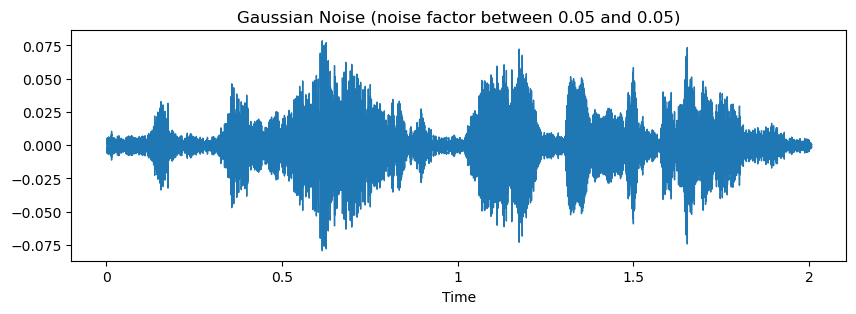

Noisy audio sample with noise factor bewteen 0.05 and 0.05


-----------------------------


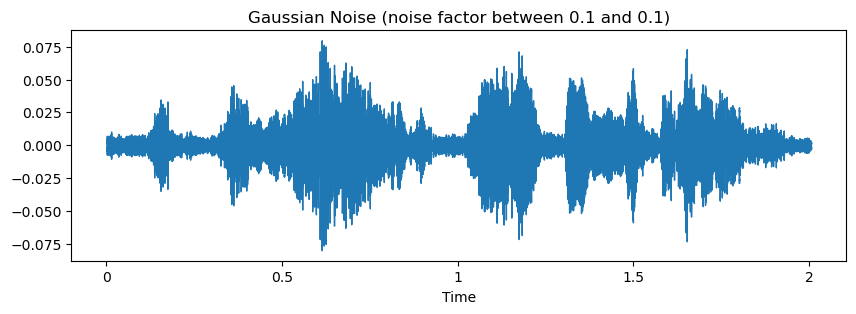

Noisy audio sample with noise factor bewteen 0.1 and 0.1


-----------------------------


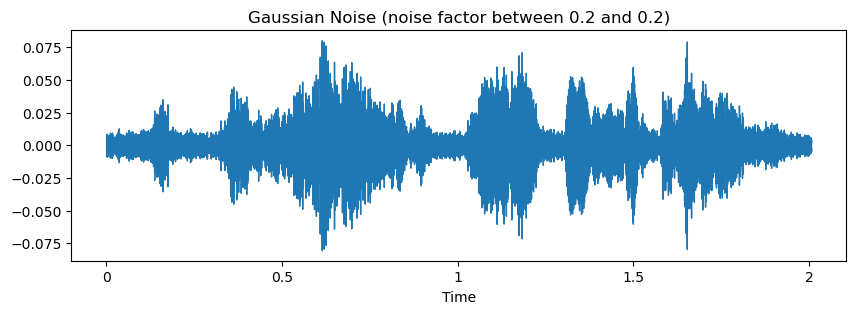

Noisy audio sample with noise factor bewteen 0.2 and 0.2


-----------------------------


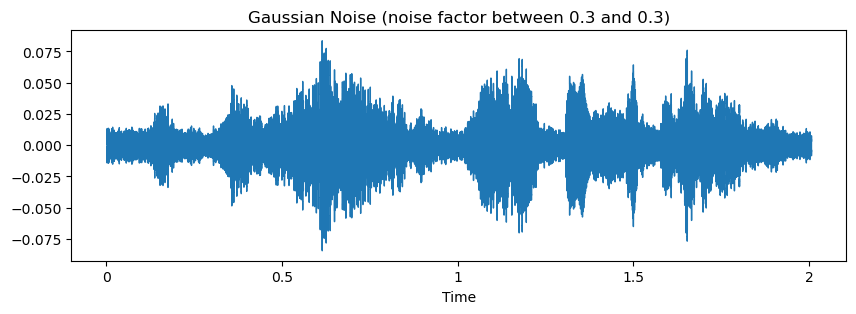

Noisy audio sample with noise factor bewteen 0.3 and 0.3


-----------------------------


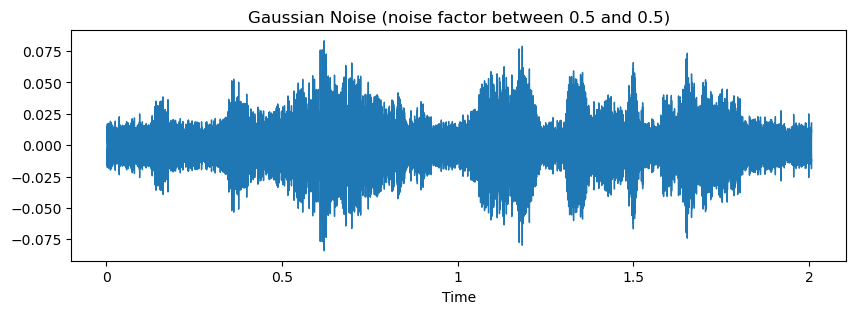

Noisy audio sample with noise factor bewteen 0.5 and 0.5


-----------------------------
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original audio sample: ../../data/./dataset/mlend/MLEndSND_Public/23409.wav


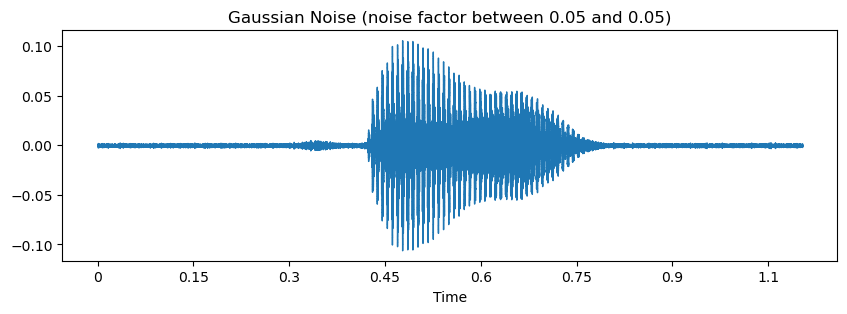

Noisy audio sample with noise factor bewteen 0.05 and 0.05


-----------------------------


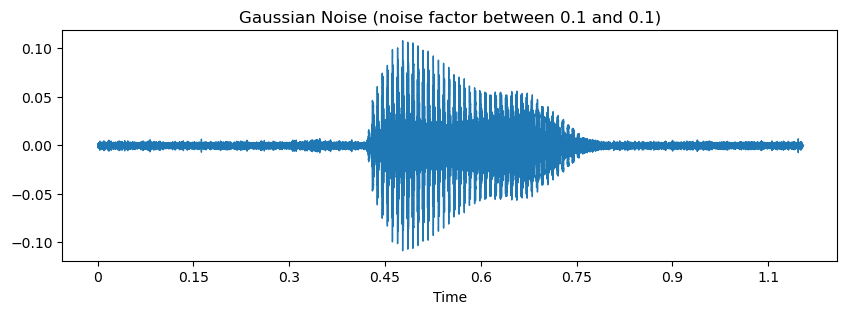

Noisy audio sample with noise factor bewteen 0.1 and 0.1


-----------------------------


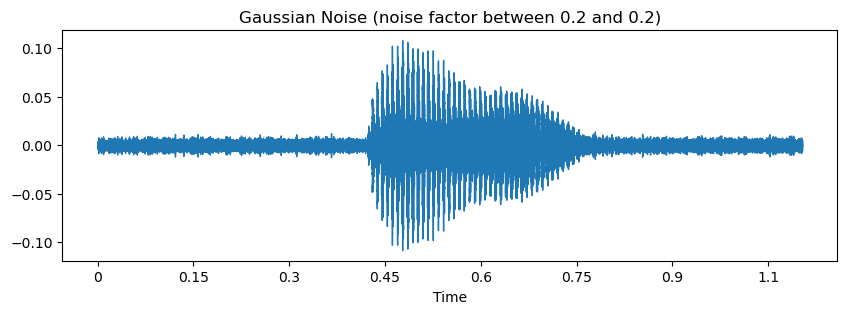

Noisy audio sample with noise factor bewteen 0.2 and 0.2


-----------------------------


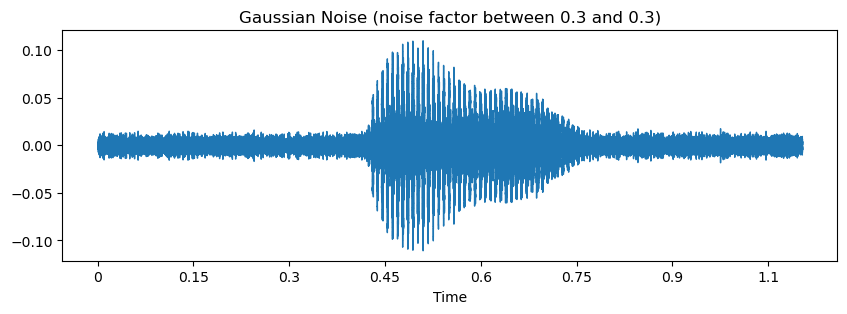

Noisy audio sample with noise factor bewteen 0.3 and 0.3


-----------------------------


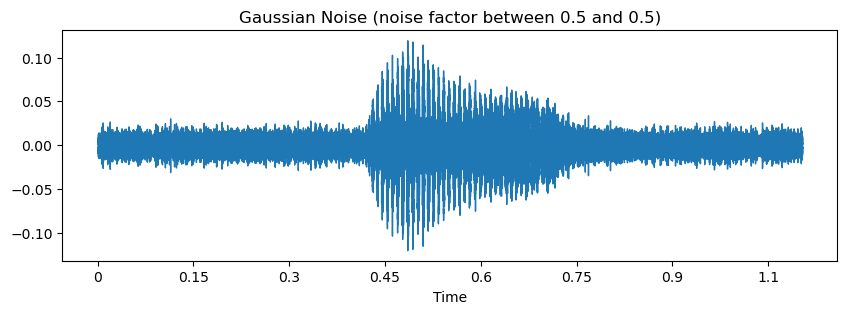

Noisy audio sample with noise factor bewteen 0.5 and 0.5


-----------------------------
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original audio sample: ../../data/./dataset/esd/0016/Angry/0016_000632.wav


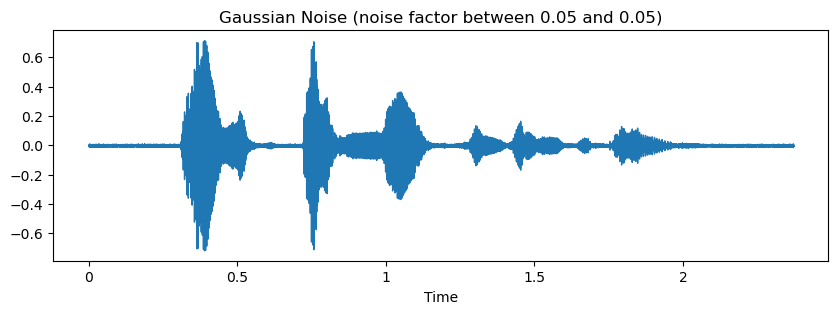

Noisy audio sample with noise factor bewteen 0.05 and 0.05


-----------------------------


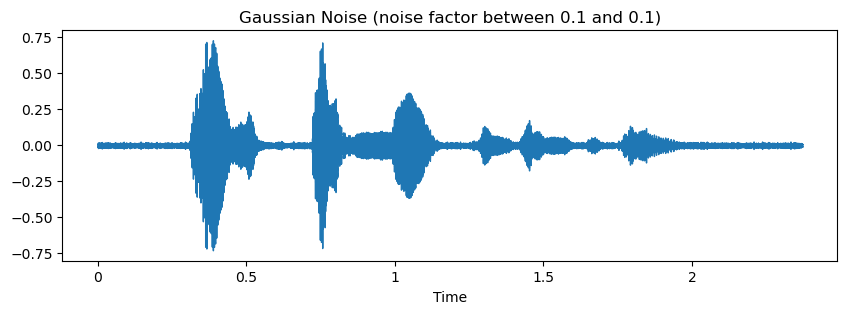

Noisy audio sample with noise factor bewteen 0.1 and 0.1


-----------------------------


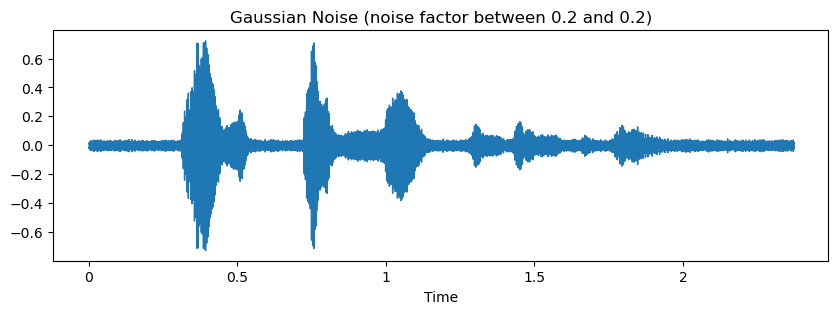

Noisy audio sample with noise factor bewteen 0.2 and 0.2


-----------------------------


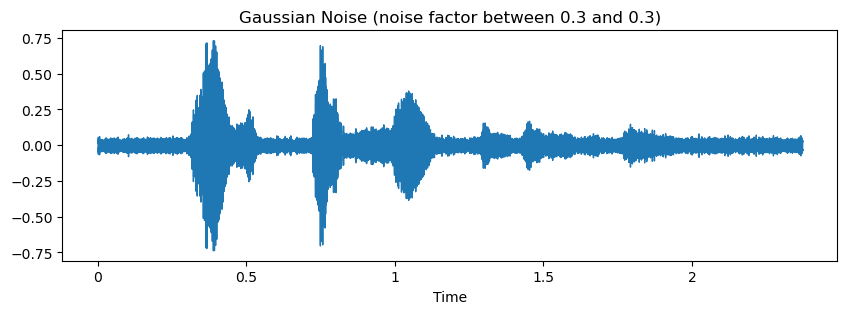

Noisy audio sample with noise factor bewteen 0.3 and 0.3


-----------------------------


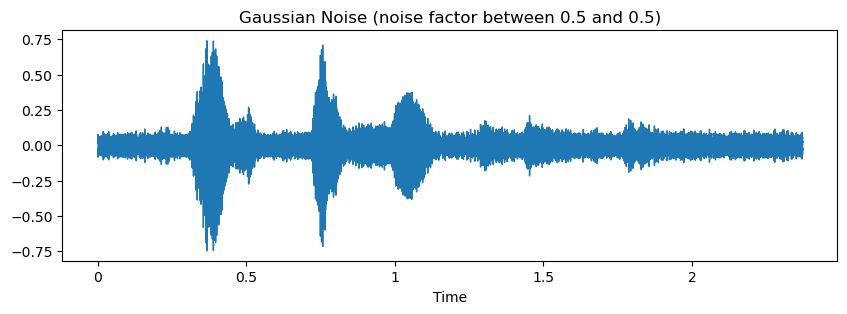

Noisy audio sample with noise factor bewteen 0.5 and 0.5


-----------------------------
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original audio sample: ../../data/./dataset/jl-corpus/Raw JL corpus (unchecked and unannotated)/JL(wav+txt)/female2_angry_2b_2.wav


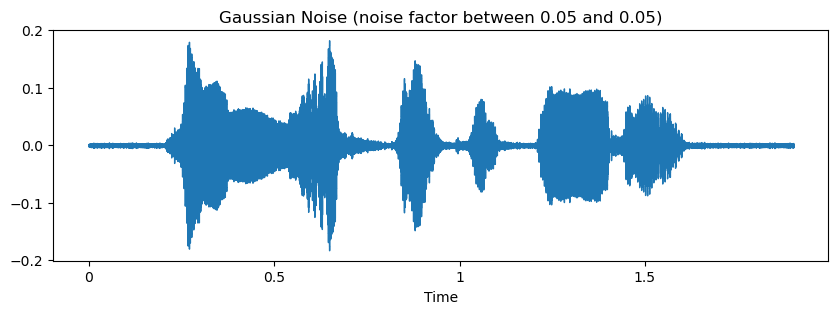

Noisy audio sample with noise factor bewteen 0.05 and 0.05


-----------------------------


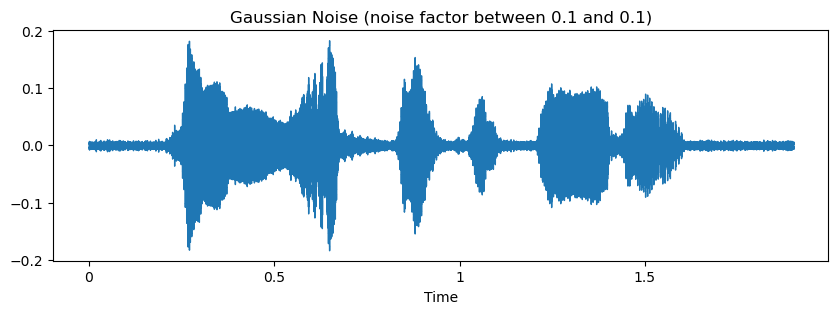

Noisy audio sample with noise factor bewteen 0.1 and 0.1


-----------------------------


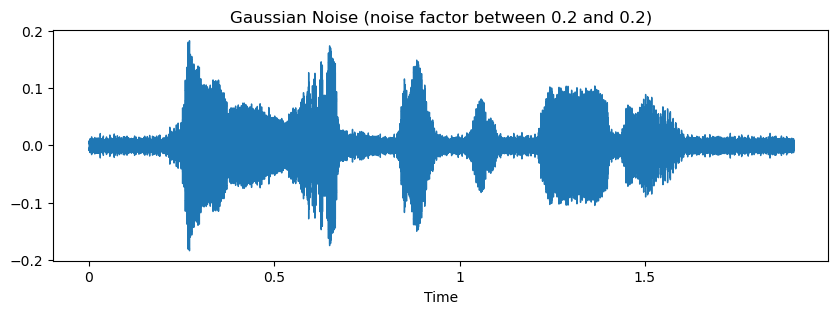

Noisy audio sample with noise factor bewteen 0.2 and 0.2


-----------------------------


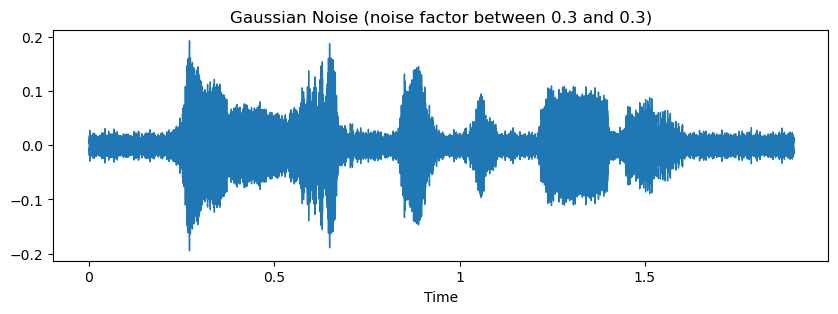

Noisy audio sample with noise factor bewteen 0.3 and 0.3


-----------------------------


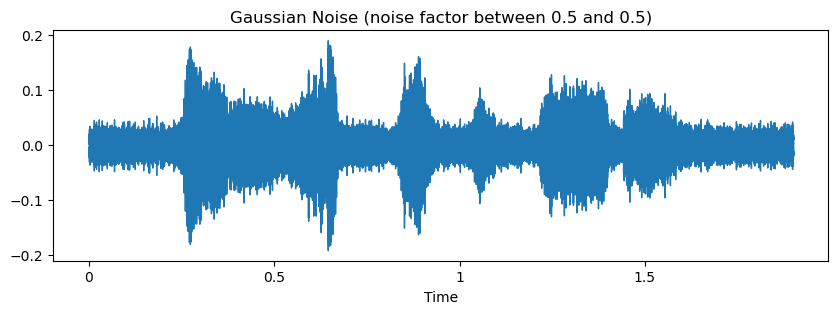

Noisy audio sample with noise factor bewteen 0.5 and 0.5


-----------------------------
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original audio sample: ../../data/./dataset/mlend/MLEndSND_Public/20459.wav


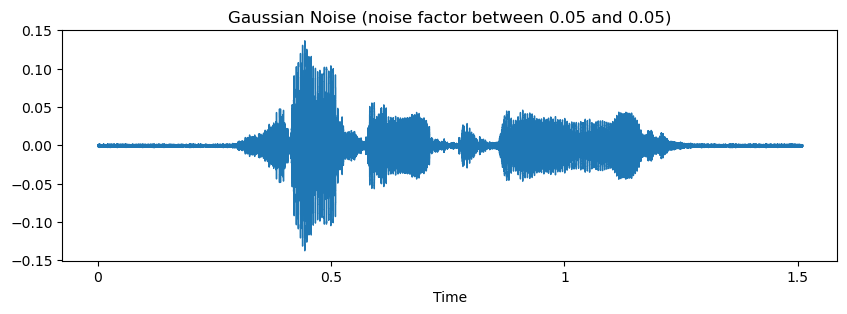

Noisy audio sample with noise factor bewteen 0.05 and 0.05


-----------------------------


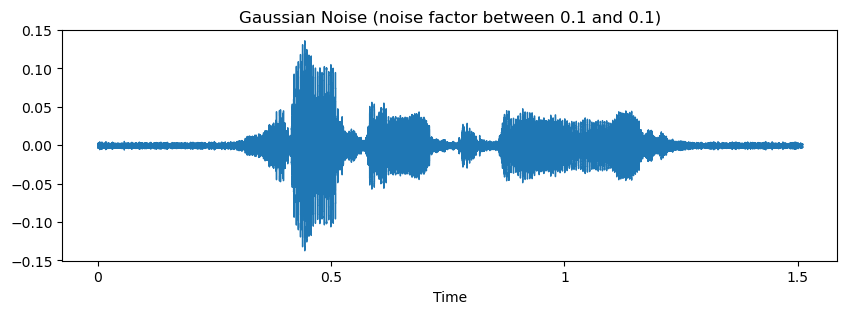

Noisy audio sample with noise factor bewteen 0.1 and 0.1


-----------------------------


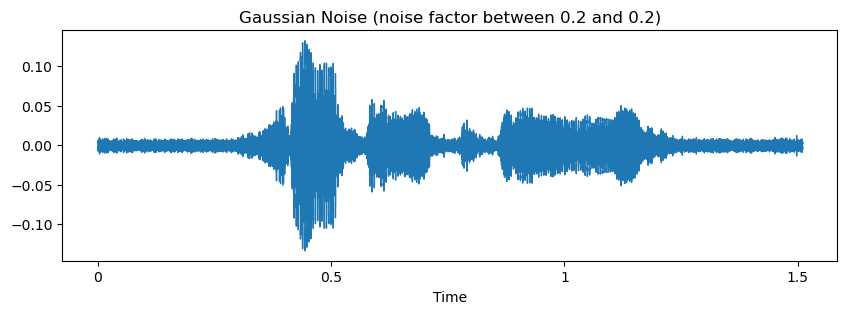

Noisy audio sample with noise factor bewteen 0.2 and 0.2


-----------------------------


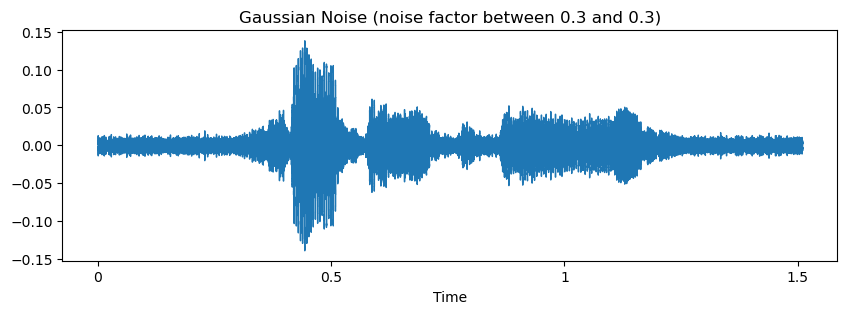

Noisy audio sample with noise factor bewteen 0.3 and 0.3


-----------------------------


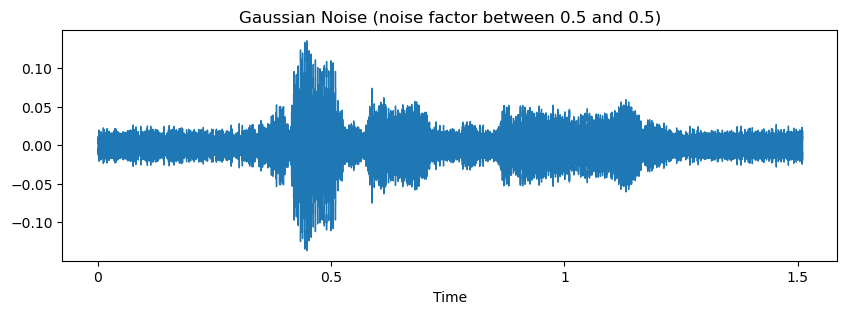

Noisy audio sample with noise factor bewteen 0.5 and 0.5


-----------------------------
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [8]:
for random_filepath in random_filepaths:
    # Load an audio example
    y, sr = librosa.load(random_filepath, sr=16000)

    print(f'Original audio sample: {random_filepath}')
    display(ipd.Audio(torch.tensor(y).numpy(), rate=sr))

    # Experiment with a range of values
    noise_factors = [0.05, 0.1, 0.2, 0.3, 0.5]

    for noise_factor in noise_factors:
        noise_transform = AddGaussianNoise(
            noise_factor_range=(noise_factor, noise_factor))
        noisy_audio = noise_transform(torch.tensor(y)).numpy()

        # Visualize waveform
        plt.figure(figsize=(10, 3))
        librosa.display.waveshow(noisy_audio, sr=sr)
        plt.title(
            f"Gaussian Noise (noise factor between {noise_factor} and {noise_factor})")
        plt.show()

        print(
            f'Noisy audio sample with noise factor bewteen {noise_factor} and {noise_factor}')
        # Listen to audio
        display(ipd.Audio(noisy_audio, rate=sr))
        print('-----------------------------')

    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

It seems like a noise factor of 0.2 (range being 0.2 to 0.2) offers a reasonable balance between realism while ensuring reproducibility across evaluation runs
